In [1]:
#Importing Libraries

import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Loading Data

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data Cleanup

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

df['job_skills'] = df['job_skills'].apply(lambda skill_list:  ast.literal_eval(skill_list) if isinstance(skill_list, str) else skill_list)


In [ ]:
df_da_us = df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()
df_da_us = df_da_us.dropna(subset=['salary_year_avg'])

In [4]:
df_da_us['salary_year_avg'].sample(10)

251842     76892.0
403473    105000.0
291413     49350.0
503777    119908.0
413353     73631.0
112945    110000.0
604797     83500.0
597061    115000.0
377271     85000.0
554835     72500.0
Name: salary_year_avg, dtype: float64

<Axes: >

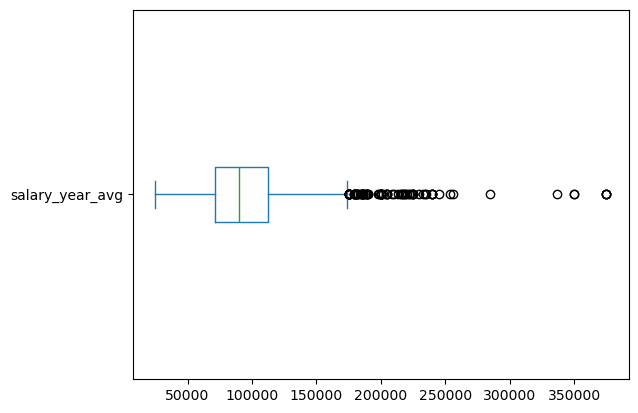

In [9]:
df_da_us['salary_year_avg'].plot(kind='box', vert=False)

C:\Users\dylan\AppData\Local\Temp\ipykernel_2028\1831454542.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert=False)


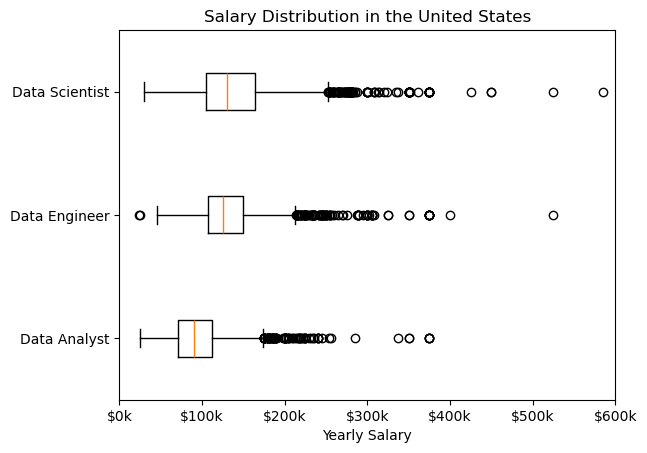

In [17]:
job_titles = ['Data Analyst', 'Data Engineer' ,'Data Scientist']

df_us = df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_us = df_us.dropna(subset=['salary_year_avg'])

job_list = [df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]

plt.boxplot(job_list, labels = job_titles, vert=False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos:  f'${int(x/1000)}k'))
plt.xlim(0, 600000)

plt.show()